# Malaria Image Classification using Keras

In this notebook, I'll work with the Malaria Cell Images dataset to classify cells as either **Parasitized** or **Uninfected**. I'll use **Convolutional Neural Networks** to make the classification.

## Import libraries

The first step is to import all the necessary packages including `sklearn`, `pandas`, `numpy`, `matplotlib` and `keras`. I'll work with **Tensorflow** as the backend. I'll also import `Image`, `cv2` and `os` to work with images.

In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow' # Added to set the backend as Tensorflow
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
import os
import cv2
from PIL import Image

## Import dataset

I'll now import the dataset and take a look at the two types of image data available. I'll use the image size to be 64x64.

In [5]:
DATA_DIR = 'cell_images/'
SIZE = 64
dataset = []
label = []

### Parasitized cell images

I iterate through all images in the **Parasitized** folder. I check if the file extension of the file being read is *png*.
I then resize the image to 64x64 and then save it to the `dataset` variable as numpy array. The label for this is set as `0`.

In [6]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

### Uninfected cell images

I iterate through all images in the **Uninfected** folder. I check if the file extension of the file being read is *png*.
I then resize the image to 64x64 and then save it to the `dataset` variable as numpy array. The label for this is set as `0`.

In [7]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

## Visualize data

Now, I'll take a look at 5 random images from both **Parasitized** and **Uninfected** pools.

### Parasitized images

I randomly select 5 values from the number of parasitized images and then display them in a row.

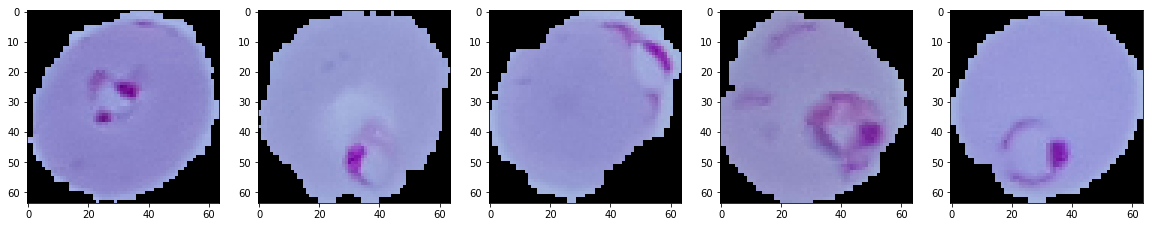

In [8]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

### Uninfected images

I randomly select 5 values from the number of uninfected images and then display them in a row. I add the count of images of parasitized images to these index such that I am now showing images with label 1.

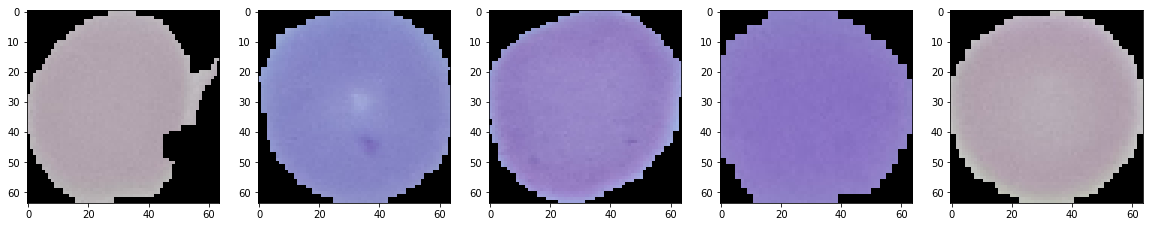

In [9]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

## Applying CNN

I'll apply Convolutional Neural Networks with 2 Convolutional Layers followed by 2 Dense layers.

### Build the classifier

I create a Sequential model with all the layers. I used the metric as `accuracy`.

In [11]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 29, 30)        8960      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 14, 30)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 14, 30)        120       
__________

### Split the dataset

I split the dataset into training and testing dataset.
1. Training data: 80%
2. Testing data: 20%

In [12]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

### Training the model

As the training data is now ready, I will use it to train the classifier.

In [17]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Train on 19841 samples, validate on 2205 samples
Epoch 1/50
19841/19841 [==============================] - 94s 5ms/step - loss: 0.2627 - acc: 0.8985 - val_loss: 0.2567 - val_acc: 0.9098
Epoch 2/50
19841/19841 [==============================] - 93s 5ms/step - loss: 0.1856 - acc: 0.9334 - val_loss: 0.2417 - val_acc: 0.9175
Epoch 3/50
19841/19841 [==============================] - 93s 5ms/step - loss: 0.1577 - acc: 0.9425 - val_loss: 0.2524 - val_acc: 0.8993
Epoch 4/50
19841/19841 [==============================] - 94s 5ms/step - loss: 0.1466 - acc: 0.9458 - val_loss: 0.2618 - val_acc: 0.9002
Epoch 5/50
19841/19841 [==============================] - 95s 5ms/step - loss: 0.1335 - acc: 0.9492 - val_loss: 0.2121 - val_acc: 0.9338
Epoch 6/50
19841/19841 [==============================] - 95s 5ms/step - loss: 0.1201 - acc: 0.9535 - val_loss: 0.2265 - val_acc: 0.9211
Epoch 7/50
19841/19841 [==============================] - 95s 5ms/step - loss: 0.1122 - acc: 0.9556 - val_loss: 0.2579 - val_acc:

## Accuracy calculation

I'll now calculate the accuracy on the test data.

In [23]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

5512/5512 [==============================] - 7s 1ms/step
Test_Accuracy: 59.20%


## Improving the accuracy with Augmentation

I will use **ImageDataGenerator** to generate more image data and then train the model on the same.

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

Now I will use `fit_generator` methods to train the model and test on the validation data.

In [ ]:
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 50,
                                   shuffle = False)

Epoch 1/50
 10/344 [..............................] - ETA: 1:54 - loss: 0.5381 - acc: 0.7094

### Exploring new accuracy

Finally, after training on augmented data, I'll check the accuracy on the testing data.

In [ ]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(classifier.evaluate_generator(test_generator, steps = len(X_test), verbose = 1)[1]*100))

As we can see, with **Data Augmentation** I was able to improve the accuracy further. Such a technique can be highly useful whenever we have limited dataset. This can ensure proper training of the model.

## Conclusion

In this notebook, I worked with the Malaria Cell Images dataset and applied **Convolutional Neural Networks** using Keras.
I observed high accuracy which further increased with data augmentation.